# 深度学习用于计算机视觉

## 卷积神经网络简介

In [1]:
from keras import models
from keras import layers

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 实例化一个小型的卷积神经网络
model_1 = models.Sequential()
model_1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64,(3,3),activation='relu'))
model_1.add(layers.MaxPooling2D((2,2)))
model_1.add(layers.Conv2D(64,(3,3),activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64,activation='relu'))
model_1.add(layers.Dense(10,activation='softmax'))

In [5]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model_1.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model_1.fit(train_images,train_labels,epochs=5,batch_size=64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 55s 917us/step - loss: 0.1752 - acc: 0.9452
Epoch 2/5
60000/60000 [==============================] - 54s 902us/step - loss: 0.0479 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 53s 888us/step - loss: 0.0330 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 53s 887us/step - loss: 0.0249 - acc: 0.9923
Epoch 5/5
60000/60000 [==============================] - 54s 893us/step - loss: 0.0198 - acc: 0.9941


In [7]:
test_loss,test_acc = model_1.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 303us/step


In [8]:
test_acc

0.9906

## 在小型数据集上从头开始训练一个卷积神经网络

### 深度学习与小数据问题的相关性

### 下载数据

### 构建网络

In [9]:
# 将猫狗分类的小型卷积神经网络实例化
model_2 = models.Sequential()
model_2.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model_2.add(layers.MaxPool2D((2,2)))
model_2.add(layers.Conv2D(64,(3,3),activation='relu'))
model_2.add(layers.MaxPool2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPool2D((2,2)))
model_2.add(layers.Conv2D(128,(3,3),activation='relu'))
model_2.add(layers.MaxPool2D((2,2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(512,activation='relu'))
model_2.add(layers.Dense(1,activation='sigmoid'))

In [10]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [11]:
from keras import optimizers

model_2.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

### 数据预处理

In [15]:
# 使用ImageDataGenerator从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = './data/dogs_vs_cats_small/train/'
validation_dir = './data/dogs_vs_cats_small/validation/'

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# 利用批量生成器拟合模型
history_2 = model_2.fit_generator(train_generator,
                                 steps_per_epoch=100,
                                 epochs=30,
                                 validation_data=validation_generator,
                                 validation_steps=50)

Epoch 1/30
100/100 [==============================] - 108s 1s/step - loss: 0.6963 - acc: 0.5375 - val_loss: 0.6754 - val_acc: 0.6330
Epoch 2/30
100/100 [==============================] - 107s 1s/step - loss: 0.6637 - acc: 0.6080 - val_loss: 0.6846 - val_acc: 0.5520
Epoch 3/30
100/100 [==============================] - 105s 1s/step - loss: 0.6203 - acc: 0.6695 - val_loss: 0.6322 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.5736 - acc: 0.7085 - val_loss: 0.5914 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5462 - acc: 0.7210 - val_loss: 0.5948 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5212 - acc: 0.7365 - val_loss: 0.6026 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4833 - acc: 0.7665 - val_loss: 0.5882 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 105s 1s/step - 

In [17]:
# 保存模型
model_2.save('./model/ch05/dogs_vs_cats_small_1.h5')

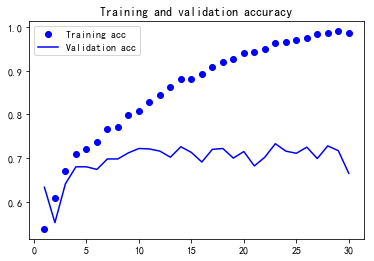

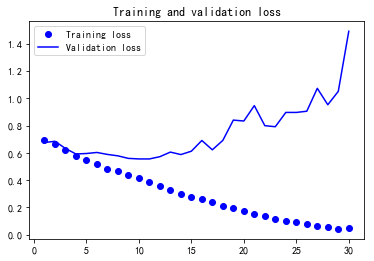

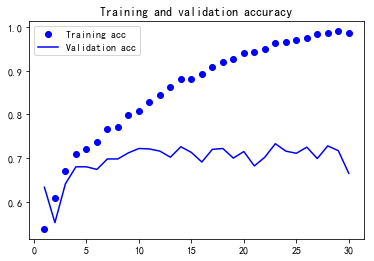

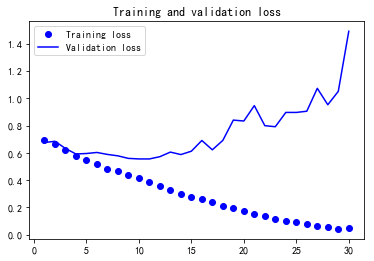

In [19]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 使用数据增强

In [23]:
# 利用ImageDataGenerator来设置数据增强
datagen = ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')

In [24]:
# 定义一个包含dropout的新卷积神经网络
from keras.preprocessing import image

model_3 = models.Sequential()
model_3.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model_3.add(layers.MaxPool2D((2,2)))
model_3.add(layers.Conv2D(64,(3,3),activation='relu'))
model_3.add(layers.MaxPool2D((2,2)))
model_3.add(layers.Conv2D(128,(3,3),activation='relu'))
model_3.add(layers.MaxPool2D((2,2)))
model_3.add(layers.Conv2D(128,(3,3),activation='relu'))
model_3.add(layers.MaxPool2D((2,2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(512,activation='relu'))
model_3.add(layers.Dense(1,activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
               optimizer = optimizers.RMSprop(lr=1e-4),
               metrics=['acc'])

In [25]:
# 利用数据增强生成器训练卷积神经网络
train_datagen_3 = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,)

test_datagen_3 = ImageDataGenerator(rescale=1./255)

train_generator_3 = train_datagen_3.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

validation_generator_3 = test_datagen_3.flow_from_directory(validation_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

history_3 = model_3.fit_generator(train_generator_3,
                                 steps_per_epoch=100,
                                 epochs=100,
                                 validation_data=validation_generator_3,
                                 validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 171s 2s/step - loss: 0.6930 - acc: 0.5213 - val_loss: 0.6816 - val_acc: 0.5482
Epoch 2/100
100/100 [==============================] - 166s 2s/step - loss: 0.6806 - acc: 0.5606 - val_loss: 0.6625 - val_acc: 0.5838
Epoch 3/100
100/100 [==============================] - 166s 2s/step - loss: 0.6672 - acc: 0.5916 - val_loss: 0.6535 - val_acc: 0.6091
Epoch 4/100
100/100 [==============================] - 166s 2s/step - loss: 0.6553 - acc: 0.6134 - val_loss: 0.6414 - val_acc: 0.6295
Epoch 5/100
100/100 [==============================] - 167s 2s/step - loss: 0.6387 - acc: 0.6275 - val_loss: 0.6118 - val_acc: 0.6631
Epoch 6/100
100/100 [==============================] - 165s 2s/step - loss: 0.6228 - acc: 0.6556 - val_loss: 0.6074 - val_acc: 0.6688
Epoch 7/100
100/100 [==============================] - 167s 2s/step - loss: 0.6178 - acc: 0.6600 - val_loss: 0.5

In [26]:
# 保存模型
model_3.save('./model/ch05/dogs_vs_cats_small_2.h5')

## 使用预训练的卷积神经网络

### 特征提取

In [27]:
# 将VGG16卷积基实例化
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top= False,
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 55s 1us/step


In [28]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

#### 不适用数据增强的快速特征提取

优点： 方法速度快，计算代价低，只运行一次卷积基

缺点：不允许使用数据增强

In [29]:
# 使用预训练的卷积基提取特征
import os 
import numpy as np
 
base_dir = './data/dogs_vs_cats_small/'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen_4 = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen_4.flow_from_directory(directory,
                                             target_size=(150,150),
                                             batch_size=batch_size,
                                             class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features, labels

train_features_4, train_labels_4 = extract_features(train_dir,2000)
validation_features_4,validation_labels_4=extract_features(validation_dir,1000)
test_features_4,test_labels_4=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [30]:
train_features_4 = np.reshape(train_features_4,(2000,4*4*512))
validation_features_4 = np.reshape(validation_features_4,(1000,4*4*512))
test_features_4 = np.reshape(test_features_4,(1000,4*4*512))

In [31]:
# 定义并训练密集连接分类器
model_4 = models.Sequential()
model_4.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(1,activation='sigmoid'))

model_4.compile(optimizer=optimizers.RMSprop(lr=2e-5),
               loss='binary_crossentropy',
               metrics=['acc'])

history_4 = model_4.fit(train_features_4,
                        train_labels_4,
                        epochs=30,
                        batch_size=20,
                        validation_data=(validation_features_4,validation_labels_4))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6055 - acc: 0.6620 - val_loss: 0.4751 - val_acc: 0.7690
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4347 - acc: 0.8065 - val_loss: 0.3612 - val_acc: 0.8600
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3489 - acc: 0.8605 - val_loss: 0.3223 - val_acc: 0.8670
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3107 - acc: 0.8695 - val_loss: 0.2964 - val_acc: 0.8800
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2767 - acc: 0.8865 - val_loss: 0.2804 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2627 - acc: 0.8960 - val_loss: 0.2706 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2422 - acc: 0.9055 - val_loss: 0.2619 - val_acc: 0.8960
Epoch 8/30
200

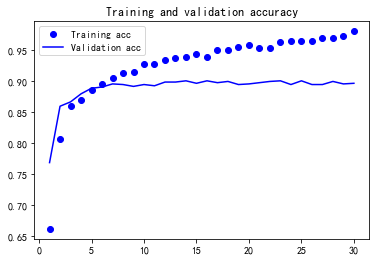

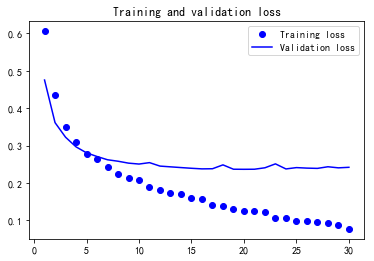

In [32]:
# 绘制结果
acc_4= history_4.history['acc']
val_acc_4 = history_4.history['val_acc']
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

epochs = range(1,len(acc_4)+1)

plt.plot(epochs,acc_4,'bo',label='Training acc')
plt.plot(epochs,val_acc_4,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss_4,'bo',label='Training loss')
plt.plot(epochs,val_loss_4,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 使用数据增强的特征提取

优点：可以数据增强

缺点：运算慢，每次都要运算一次卷积基（在CPU运行巨慢，还是不要尝试了）

### 微调模型

In [33]:
# 冻结直到某一层的所有层

conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False            

In [34]:
model_4.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-5),
                metrics=['acc'])